In [1]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

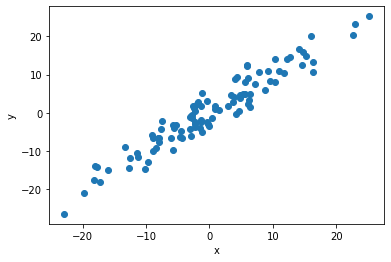

In [14]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X, y, 'o')
plt.ylabel('y')
plt.xlabel('x')

In [3]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [4]:
def forward(x):
    y = w * x + b
    return y

In [5]:
forward(torch.tensor([[5], [25]]))

tensor([[16.],
        [76.]], grad_fn=<AddBackward0>)

In [6]:
forward(5)

tensor(16., grad_fn=<AddBackward0>)

In [7]:
torch.manual_seed(1)

In [8]:
model = Linear(in_features=1, out_features=1)

In [9]:
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [10]:
t = torch.tensor([[1.2], [5.4]])
model(t)

tensor([[0.1769],
        [2.3410]], grad_fn=<AddmmBackward0>)

In [3]:
from typing import Union

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_ = Linear(input_size, output_size)
        
    def forward(self, x):
        pred = self.linear_(x)
        return pred

In [9]:
model = LR(1, 1)
print(model.parameters)

<bound method Module.parameters of LR(
  (linear_): Linear(in_features=1, out_features=1, bias=True)
)>


In [10]:
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.5420]], requires_grad=True) Parameter containing:
tensor([-0.8883], requires_grad=True)


In [11]:
def get_params(model):
    [w_, b_] = model.parameters()
    w = w_[0][0].item()
    b = b_[0].item()
    return (w, b)

In [18]:
def plot_fit(model, X, y, title):
    plt.title = title
    w, b = get_params(model)
    x1 = np.array([-30, 30])
    y1 = w * x1 + b
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

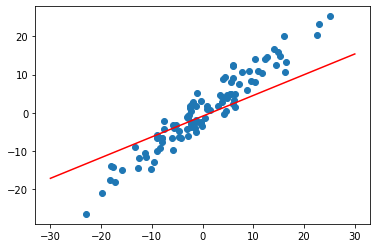

In [19]:
plot_fit(model, X, y, 'Initial model')

In [20]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [21]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch: " + str(i), "loss: " + str(loss.item()))
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 26.729928970336914
epoch: 1 loss: 22.350481033325195
epoch: 2 loss: 19.02893829345703
epoch: 3 loss: 16.50739860534668
epoch: 4 loss: 14.590912818908691
epoch: 5 loss: 13.1321382522583
epoch: 6 loss: 12.019695281982422
epoch: 7 loss: 11.169391632080078
epoch: 8 loss: 10.517590522766113
epoch: 9 loss: 10.016164779663086
epoch: 10 loss: 9.628744125366211
epoch: 11 loss: 9.3278169631958
epoch: 12 loss: 9.092578887939453
epoch: 13 loss: 8.907297134399414
epoch: 14 loss: 8.7600679397583
epoch: 15 loss: 8.641881942749023
epoch: 16 loss: 8.545919418334961
epoch: 17 loss: 8.467016220092773
epoch: 18 loss: 8.401259422302246
epoch: 19 loss: 8.345678329467773
epoch: 20 loss: 8.29802131652832
epoch: 21 loss: 8.25657844543457
epoch: 22 loss: 8.220044136047363
epoch: 23 loss: 8.187427520751953
epoch: 24 loss: 8.157970428466797
epoch: 25 loss: 8.131089210510254
epoch: 26 loss: 8.106340408325195
epoch: 27 loss: 8.08337688446045
epoch: 28 loss: 8.061931610107422
epoch: 29 loss: 8.0417947

Text(0.5, 0, 'epoch')

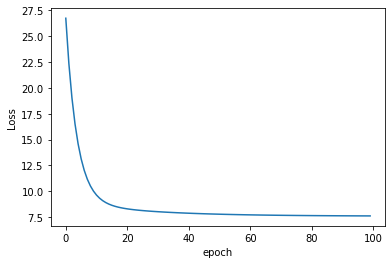

In [26]:
plt.plot(range(epochs), [x.item() for x in losses])
plt.ylabel('Loss')
plt.xlabel('epoch')

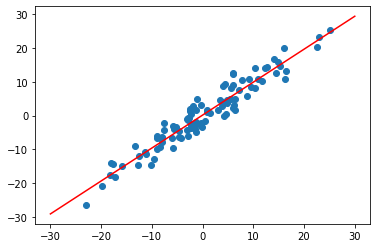

In [27]:
plot_fit(model, X, y, 'Fit model')